In [33]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


import time
import random

# Dakota Wernimont and Ahmed Abbas Group Project

# Open link and go through every year while displaying link for each one

In [18]:
#Define year that we want to start
year = 2010

#Import URL and open the browser
url = "https://www.nfl.com/stats/team-stats/offense/passing/" + str(year) + "/reg/all"
browser = webdriver.Chrome()
browser.maximize_window()

page_counter = 1

#Create loop to go through each year until we reach the most recent
while year < 2024:  
    print(year)
    
    url = "https://www.nfl.com/stats/team-stats/offense/passing/" + str(year) + "/reg/all"
    print(url)
    browser.get(url)
    
    #Random wait time to not seem like a bot
    time.sleep(random.uniform(1,4))

    #Count number of pages we go through
    page_counter += 1

    #Add a year for every year we go through
    year += 1

2010
https://www.nfl.com/stats/team-stats/offense/passing/2010/reg/all
2011
https://www.nfl.com/stats/team-stats/offense/passing/2011/reg/all
2012
https://www.nfl.com/stats/team-stats/offense/passing/2012/reg/all
2013
https://www.nfl.com/stats/team-stats/offense/passing/2013/reg/all
2014
https://www.nfl.com/stats/team-stats/offense/passing/2014/reg/all
2015
https://www.nfl.com/stats/team-stats/offense/passing/2015/reg/all
2016
https://www.nfl.com/stats/team-stats/offense/passing/2016/reg/all
2017
https://www.nfl.com/stats/team-stats/offense/passing/2017/reg/all
2018
https://www.nfl.com/stats/team-stats/offense/passing/2018/reg/all
2019
https://www.nfl.com/stats/team-stats/offense/passing/2019/reg/all
2020
https://www.nfl.com/stats/team-stats/offense/passing/2020/reg/all
2021
https://www.nfl.com/stats/team-stats/offense/passing/2021/reg/all
2022
https://www.nfl.com/stats/team-stats/offense/passing/2022/reg/all
2023
https://www.nfl.com/stats/team-stats/offense/passing/2023/reg/all


# Scrape Data from the website and create a dataframe

In [6]:
#Open Browser to start scraping data
browser = webdriver.Chrome()
browser.maximize_window()

#Create a set of years we want to go through
start_year = 2010
end_year = 2024

#Somewhere to store data
all_data = []


#Create loop to keep going through every year
for year in range(start_year, end_year):
    
    url = "https://www.nfl.com/stats/team-stats/offense/passing/" + str(year) + "/reg/all"
    browser.get(url)

    #Wait to ensure all data is loaded before start scraping
    table = WebDriverWait(browser, 10).until(
        EC.presence_of_element_located((By.TAG_NAME, "table"))
    )
        
    rows = table.find_elements(By.TAG_NAME, "tr")

    for row in rows[1:]:  
        cols = row.find_elements(By.TAG_NAME, "td")
        row_data = [col.text for col in cols]
        row_data.insert(0, year)
        all_data.append(row_data)
    
time.sleep(random.uniform(1, 4))

df = pd.DataFrame(all_data, columns=headers)
df.to_csv = ('Team_Stats.csv')
print("Data scraping completed.")

NameError: name 'webdriver' is not defined

In [7]:
#Open df so we don't have to scrape again
df = pd.read_csv('nfl_passing_stats.csv')

#Keep Team Names consistent
df['Team'] = df['Team'].replace(['Team', 'Redskins','Football Team'], 'Commanders')
df['Team'] = df['Team'].replace(['Niners'], '49ers')

df

,Year,Team,Att,Cmp,Cmp %,Yds/Att,Pass Yds,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY
0,2010,Bears,466,276,59.2,7.3,3397,23,21,79.5,163,35.0,42,6,89T,56,382
1,2010,Bengals,590,365,61.9,6.8,3988,26,20,82.4,206,34.9,45,9,78T,28,221
2,2010,Bills,519,296,57.0,6.5,3371,24,21,75.2,166,32.0,42,8,65,34,213
3,2010,Broncos,580,334,57.6,7.4,4307,25,12,86.8,204,35.2,62,13,71,40,269
4,2010,Browns,478,296,61.9,6.7,3203,13,18,75.0,154,32.2,42,6,65,36,214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,2023,Seahawks,575,371,64.5,7.2,4167,23,12,90.7,189,32.9,56,6,73T,38,257
444,2023,Steelers,506,323,63.8,6.8,3421,13,9,84.6,153,30.2,41,9,86,36,258
445,2023,Texans,592,372,62.8,7.7,4578,27,8,96.2,215,36.3,69,10,75,47,405
446,2023,Titans,494,304,61.5,7.1,3512,14,11,83.2,158,32.0,54,10,70,64,445


# Import other DF and Integrate horizontally

In [10]:
#Read other dataframe from kaggle
df_wins = pd.read_csv('team_stats_2010_2023.csv')

#Remove team locations to match the df above
df_wins['team'] = df_wins['team'].str.split().str[-1]

#Uppercase year and team to match above
df_wins.columns= df_wins.columns.str.capitalize()

#Keep Team names consistent
df_wins['Team'] = df_wins['Team'].replace(['Team', 'Redskins','Football Team'], 'Commanders')
df['Team'] = df['Team'].replace(['Niners'], '49ers')

df_wins

,Year,Team,Wins,Losses,Win_loss_perc,Points,Points_opp,Points_diff,G,Plays_offense,Yds_per_play_offense,Turnovers,Fumbles_lost,Penalties,Penalties_yds,Pen_fd,Score_pct,Turnover_pct
0,2010,Patriots,14,2,0.875,518,313,205,16,986,5.9,10,5,83,766,20,47.0,11.3
1,2010,Jets,11,5,0.688,367,304,63,16,1087,5.2,21,7,103,934,18,32.2,17.2
2,2010,Dolphins,7,9,0.438,273,333,-60,16,1040,5.0,31,10,72,595,20,29.7,17.6
3,2010,Bills,4,12,0.250,283,425,-142,16,954,5.1,39,18,82,633,15,25.3,11.8
4,2010,Steelers,12,4,0.750,375,232,143,16,993,5.6,18,9,100,903,14,36.9,16.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,2023,Panthers,2,15,0.118,236,416,-180,17,1096,4.1,20,10,103,845,36,25.0,14.0
444,2023,49ers,12,5,0.706,491,298,193,17,1024,6.6,18,6,101,933,29,45.3,9.7
445,2023,Rams,10,7,0.588,404,377,27,17,1094,5.6,18,5,89,720,35,41.1,14.2
446,2023,Seahawks,9,8,0.529,364,402,-38,17,995,5.5,17,5,111,954,35,38.8,14.5


In [12]:
merged_df = pd.merge(df, df_wins, on = ['Year', 'Team'], how = 'inner')

In [14]:
merged_df

,Year,Team,Att,Cmp,Cmp %,Yds/Att,Pass Yds,TD,INT,Rate,...,G,Plays_offense,Yds_per_play_offense,Turnovers,Fumbles_lost,Penalties,Penalties_yds,Pen_fd,Score_pct,Turnover_pct
0,2010,Bears,466,276,59.2,7.3,3397,23,21,79.5,...,16,936,4.9,31,10,91,768,24,29.3,15.6
1,2010,Bengals,590,365,61.9,6.8,3988,26,20,82.4,...,16,1046,5.1,34,14,90,725,26,30.5,17.2
2,2010,Bills,519,296,57.0,6.5,3371,24,21,75.2,...,16,954,5.1,39,18,82,633,15,25.3,11.8
3,2010,Broncos,580,334,57.6,7.4,4307,25,12,86.8,...,16,1018,5.5,27,15,98,944,24,30.6,15.7
4,2010,Browns,478,296,61.9,6.7,3203,13,18,75.0,...,16,927,5.0,29,11,78,675,24,27.7,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,2023,Seahawks,575,371,64.5,7.2,4167,23,12,90.7,...,17,995,5.5,17,5,111,954,35,38.8,14.5
444,2023,Steelers,506,323,63.8,6.8,3421,13,9,84.6,...,17,1029,5.0,16,7,86,753,19,29.9,8.5
445,2023,Texans,592,372,62.8,7.7,4578,27,8,96.2,...,17,1083,5.4,14,6,114,937,30,37.2,11.4
446,2023,Titans,494,304,61.5,7.1,3512,14,11,83.2,...,17,1002,4.9,20,9,110,882,37,32.6,13.6


# Eliminating Unwanted Rows from Final Df

In [17]:
final_df = merged_df

In [19]:
#Insert new column for TD to INT ratio
final_df['TD_to_Turnover_Rate'] = final_df['TD'] / final_df['Turnovers']
final_df['TD_to_Turnover_Rate'] = final_df['TD_to_Turnover_Rate'].round(2)

#Insert sacks per game
final_df['Sacks_taken_per_game'] = final_df['Sck'] / final_df['G']
final_df['Sacks_taken_per_game'] = final_df['Sacks_taken_per_game'].round(2)

#Turnovers and Penalties per game
final_df['Penalties_per_game'] = final_df['Penalties'] / final_df['G']
final_df['Penalties_per_game'] = final_df['Penalties_per_game'].round(2)
final_df['Turnovers_per_game'] = final_df['Turnovers'] / final_df['G']
final_df['Turnovers_per_game'] = final_df['Turnovers_per_game'].round(2)
final_df['Big_plays_per_game'] = (final_df['20+'] + final_df['40+']) / final_df['G']
final_df['Big_plays_per_game'] = final_df['Big_plays_per_game'].round(2)


#Drop unwanted columns
final_df = merged_df.drop(columns = ['TD', '20+', '40+', 'Turnovers', 'Penalties', 'Pen_fd','INT','Att','Sck','Cmp', 'Wins', '1st', 'Losses', 'G', 'SckY', 'Lng', 'Pass Yds', 'Points', 'Points_opp', 'Fumbles_lost', 'Penalties_yds', 'Plays_offense'])

final_df

,Year,Team,Cmp %,Yds/Att,Rate,1st%,Win_loss_perc,Points_diff,Yds_per_play_offense,Score_pct,Turnover_pct,TD_to_Turnover_Rate,Sacks_taken_per_game,Penalties_per_game,Turnovers_per_game,Big_plays_per_game
0,2010,Bears,59.2,7.3,79.5,35.0,0.688,48,4.9,29.3,15.6,0.74,3.50,5.69,1.94,3.00
1,2010,Bengals,61.9,6.8,82.4,34.9,0.250,-73,5.1,30.5,17.2,0.76,1.75,5.62,2.12,3.38
2,2010,Bills,57.0,6.5,75.2,32.0,0.250,-142,5.1,25.3,11.8,0.62,2.12,5.12,2.44,3.12
3,2010,Broncos,57.6,7.4,86.8,35.2,0.250,-127,5.5,30.6,15.7,0.93,2.50,6.12,1.69,4.69
4,2010,Browns,61.9,6.7,75.0,32.2,0.313,-61,5.0,27.7,13.5,0.45,2.25,4.88,1.81,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,2023,Seahawks,64.5,7.2,90.7,32.9,0.529,-38,5.5,38.8,14.5,1.35,2.24,6.53,1.00,3.65
444,2023,Steelers,63.8,6.8,84.6,30.2,0.588,-20,5.0,29.9,8.5,0.81,2.12,5.06,0.94,2.94
445,2023,Texans,62.8,7.7,96.2,36.3,0.588,24,5.4,37.2,11.4,1.93,2.76,6.71,0.82,4.65
446,2023,Titans,61.5,7.1,83.2,32.0,0.353,-62,4.9,32.6,13.6,0.70,3.76,6.47,1.18,3.76


In [21]:
final_df

,Year,Team,Cmp %,Yds/Att,Rate,1st%,Win_loss_perc,Points_diff,Yds_per_play_offense,Score_pct,Turnover_pct,TD_to_Turnover_Rate,Sacks_taken_per_game,Penalties_per_game,Turnovers_per_game,Big_plays_per_game
0,2010,Bears,59.2,7.3,79.5,35.0,0.688,48,4.9,29.3,15.6,0.74,3.50,5.69,1.94,3.00
1,2010,Bengals,61.9,6.8,82.4,34.9,0.250,-73,5.1,30.5,17.2,0.76,1.75,5.62,2.12,3.38
2,2010,Bills,57.0,6.5,75.2,32.0,0.250,-142,5.1,25.3,11.8,0.62,2.12,5.12,2.44,3.12
3,2010,Broncos,57.6,7.4,86.8,35.2,0.250,-127,5.5,30.6,15.7,0.93,2.50,6.12,1.69,4.69
4,2010,Browns,61.9,6.7,75.0,32.2,0.313,-61,5.0,27.7,13.5,0.45,2.25,4.88,1.81,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,2023,Seahawks,64.5,7.2,90.7,32.9,0.529,-38,5.5,38.8,14.5,1.35,2.24,6.53,1.00,3.65
444,2023,Steelers,63.8,6.8,84.6,30.2,0.588,-20,5.0,29.9,8.5,0.81,2.12,5.06,0.94,2.94
445,2023,Texans,62.8,7.7,96.2,36.3,0.588,24,5.4,37.2,11.4,1.93,2.76,6.71,0.82,4.65
446,2023,Titans,61.5,7.1,83.2,32.0,0.353,-62,4.9,32.6,13.6,0.70,3.76,6.47,1.18,3.76


# Group Check In

## Question 1 

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [26]:
#Univariate
final_df['TD_to_Turnover_Rate'].describe()

count    448.000000
mean       1.179263
std        0.602192
min        0.220000
25%        0.770000
50%        1.040000
75%        1.440000
max        4.500000
Name: TD_to_Turnover_Rate, dtype: float64

In [29]:
final_df['Win_loss_perc'].describe()

count    448.000000
mean       0.500252
std        0.189040
min        0.000000
25%        0.375000
50%        0.500000
75%        0.625000
max        0.938000
Name: Win_loss_perc, dtype: float64

In [35]:
#Correlation test and hypothesis
correlation, p_value = pearsonr(final_df['TD_to_Turnover_Rate'], final_df['Win_loss_perc'])

#Interpet p value
alpha = 0.05  # significance level

if p_value > alpha:
    print("Fail to reject H0: No significant correlation (correlation = 0).")
else:
    print("Reject H0: Significant correlation exists (correlation != 0).")

Reject H0: Significant correlation exists (correlation != 0).


In [37]:
correlation, p_value

(0.6282094399602826, 1.4634369526931587e-50)

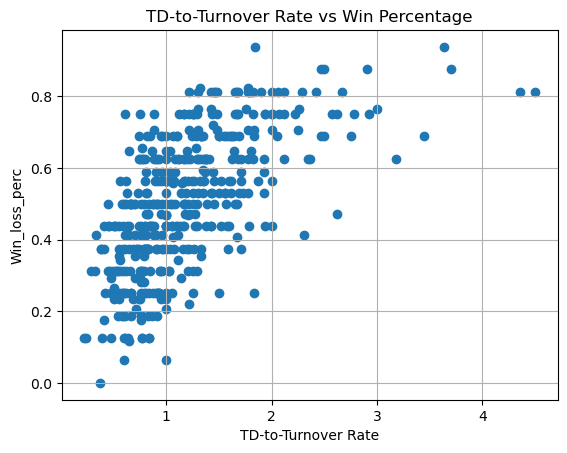

In [39]:
plt.scatter(final_df["TD_to_Turnover_Rate"], final_df["Win_loss_perc"])
plt.xlabel("TD-to-Turnover Rate")
plt.ylabel("Win_loss_perc")
plt.title("TD-to-Turnover Rate vs Win Percentage")
plt.grid(True)
plt.show()

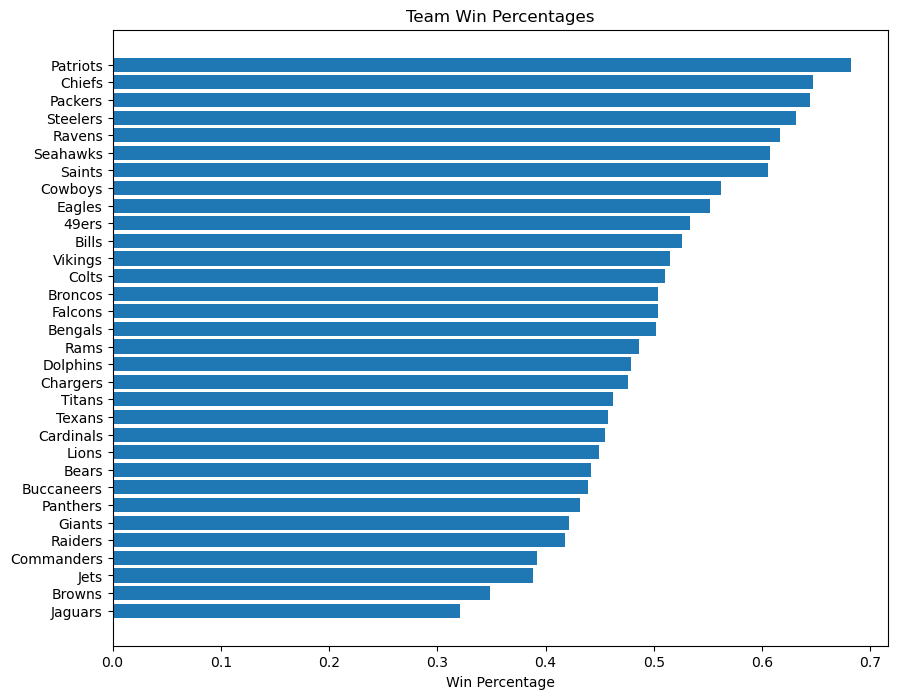

In [41]:
team_avg_win = final_df.groupby("Team")["Win_loss_perc"].mean().sort_values(ascending=False)

# Horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(team_avg_win.index, team_avg_win.values)
plt.xlabel("Win Percentage")
plt.title("Team Win Percentages")
plt.gca().invert_yaxis()  # Highest at the top
plt.show()

In [43]:
X = final_df['TD_to_Turnover_Rate'].values.reshape(-1, 1)
y = final_df['Win_loss_perc'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("R Squared:")

print(reg.score(X_test, y_test))

print("Regression Equation:")

print(reg.intercept_)

R Squared:
0.3929312000937242
Regression Equation:
0.26590015845213494


# Question 2

In [46]:
#Univariate of each variable
final_df['Yds_per_play_offense'].describe()

count    448.000000
mean       5.419643
std        0.482321
min        4.100000
25%        5.100000
50%        5.400000
75%        5.800000
max        6.800000
Name: Yds_per_play_offense, dtype: float64

In [48]:
final_df['Score_pct'].describe()

count    448.000000
mean      35.289062
std        6.595768
min       18.900000
25%       30.500000
50%       35.000000
75%       39.700000
max       52.600000
Name: Score_pct, dtype: float64

In [50]:
final_df['Turnover_pct'].describe()

count    448.000000
mean      13.083929
std        3.269897
min        4.900000
25%       10.900000
50%       12.800000
75%       15.300000
max       25.000000
Name: Turnover_pct, dtype: float64